In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/cleaned_stone.csv')

In [4]:
df.head()

,serum_creatinine,gfr,bun,serum_calcium,ana,c3_c4,hematuria,oxalate_levels,urine_ph,blood_pressure,...,alcohol,painkiller_usage,family_history,weight_changes,stress_level,months,cluster,ckd_pred,ckd_stage,stone_risk
0,0.683683,32.946784,7.553739,10.039896,0,138.204989,0,2.878164,7.864308,115.224217,...,daily,no,yes,stable,low,10,5,CKD,3,1
1,3.809044,32.685035,141.347494,8.330543,1,24.282343,1,4.767639,4.920015,130.143900,...,daily,no,yes,loss,moderate,1,2,CKD,3,1
2,1.143827,2.079805,15.979104,9.419229,0,163.970666,0,1.818613,6.188115,98.026072,...,daily,no,no,stable,moderate,4,6,CKD,5,0
3,4.804657,109.871407,53.307333,7.556631,1,71.056846,1,4.051686,5.278607,142.166650,...,never,yes,yes,stable,high,9,2,CKD,1,1
4,4.920235,42.214590,134.182157,7.289379,1,23.384639,1,3.240920,4.862923,151.962572,...,occasionally,yes,no,gain,high,7,2,CKD,3,1


In [5]:
df.shape

(4000, 24)

In [6]:
df.isnull().sum()

,0
serum_creatinine,0
gfr,0
bun,0
serum_calcium,0
ana,0
c3_c4,0
hematuria,0
oxalate_levels,0
urine_ph,0
blood_pressure,0


In [7]:
df = df.dropna(how='any')

In [8]:
df.isnull().sum()

,0
serum_creatinine,0
gfr,0
bun,0
serum_calcium,0
ana,0
c3_c4,0
hematuria,0
oxalate_levels,0
urine_ph,0
blood_pressure,0


In [9]:
df.columns

Index(['serum_creatinine', 'gfr', 'bun', 'serum_calcium', 'ana', 'c3_c4',
       'hematuria', 'oxalate_levels', 'urine_ph', 'blood_pressure',
       'physical_activity', 'diet', 'water_intake', 'smoking', 'alcohol',
       'painkiller_usage', 'family_history', 'weight_changes', 'stress_level',
       'months', 'cluster', 'ckd_pred', 'ckd_stage', 'stone_risk'],
      dtype='object')

In [10]:
df.replace({"gender":{'Female':0,'Male':1}},inplace=True)

In [11]:
df.head()

,serum_creatinine,gfr,bun,serum_calcium,ana,c3_c4,hematuria,oxalate_levels,urine_ph,blood_pressure,...,alcohol,painkiller_usage,family_history,weight_changes,stress_level,months,cluster,ckd_pred,ckd_stage,stone_risk
0,0.683683,32.946784,7.553739,10.039896,0,138.204989,0,2.878164,7.864308,115.224217,...,daily,no,yes,stable,low,10,5,CKD,3,1
1,3.809044,32.685035,141.347494,8.330543,1,24.282343,1,4.767639,4.920015,130.143900,...,daily,no,yes,loss,moderate,1,2,CKD,3,1
2,1.143827,2.079805,15.979104,9.419229,0,163.970666,0,1.818613,6.188115,98.026072,...,daily,no,no,stable,moderate,4,6,CKD,5,0
3,4.804657,109.871407,53.307333,7.556631,1,71.056846,1,4.051686,5.278607,142.166650,...,never,yes,yes,stable,high,9,2,CKD,1,1
4,4.920235,42.214590,134.182157,7.289379,1,23.384639,1,3.240920,4.862923,151.962572,...,occasionally,yes,no,gain,high,7,2,CKD,3,1


In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [10, 11, 13, 14,15,16,17,18,21])], remainder='passthrough')
X = np.array(ct.fit_transform(df))

In [13]:
X

array([[0., 0., 1., ..., 5., 3., 1.],
       [0., 0., 1., ..., 2., 3., 1.],
       [0., 0., 1., ..., 6., 5., 0.],
       ...,
       [0., 0., 1., ..., 5., 2., 0.],
       [0., 1., 0., ..., 2., 1., 1.],
       [0., 0., 1., ..., 2., 1., 1.]])

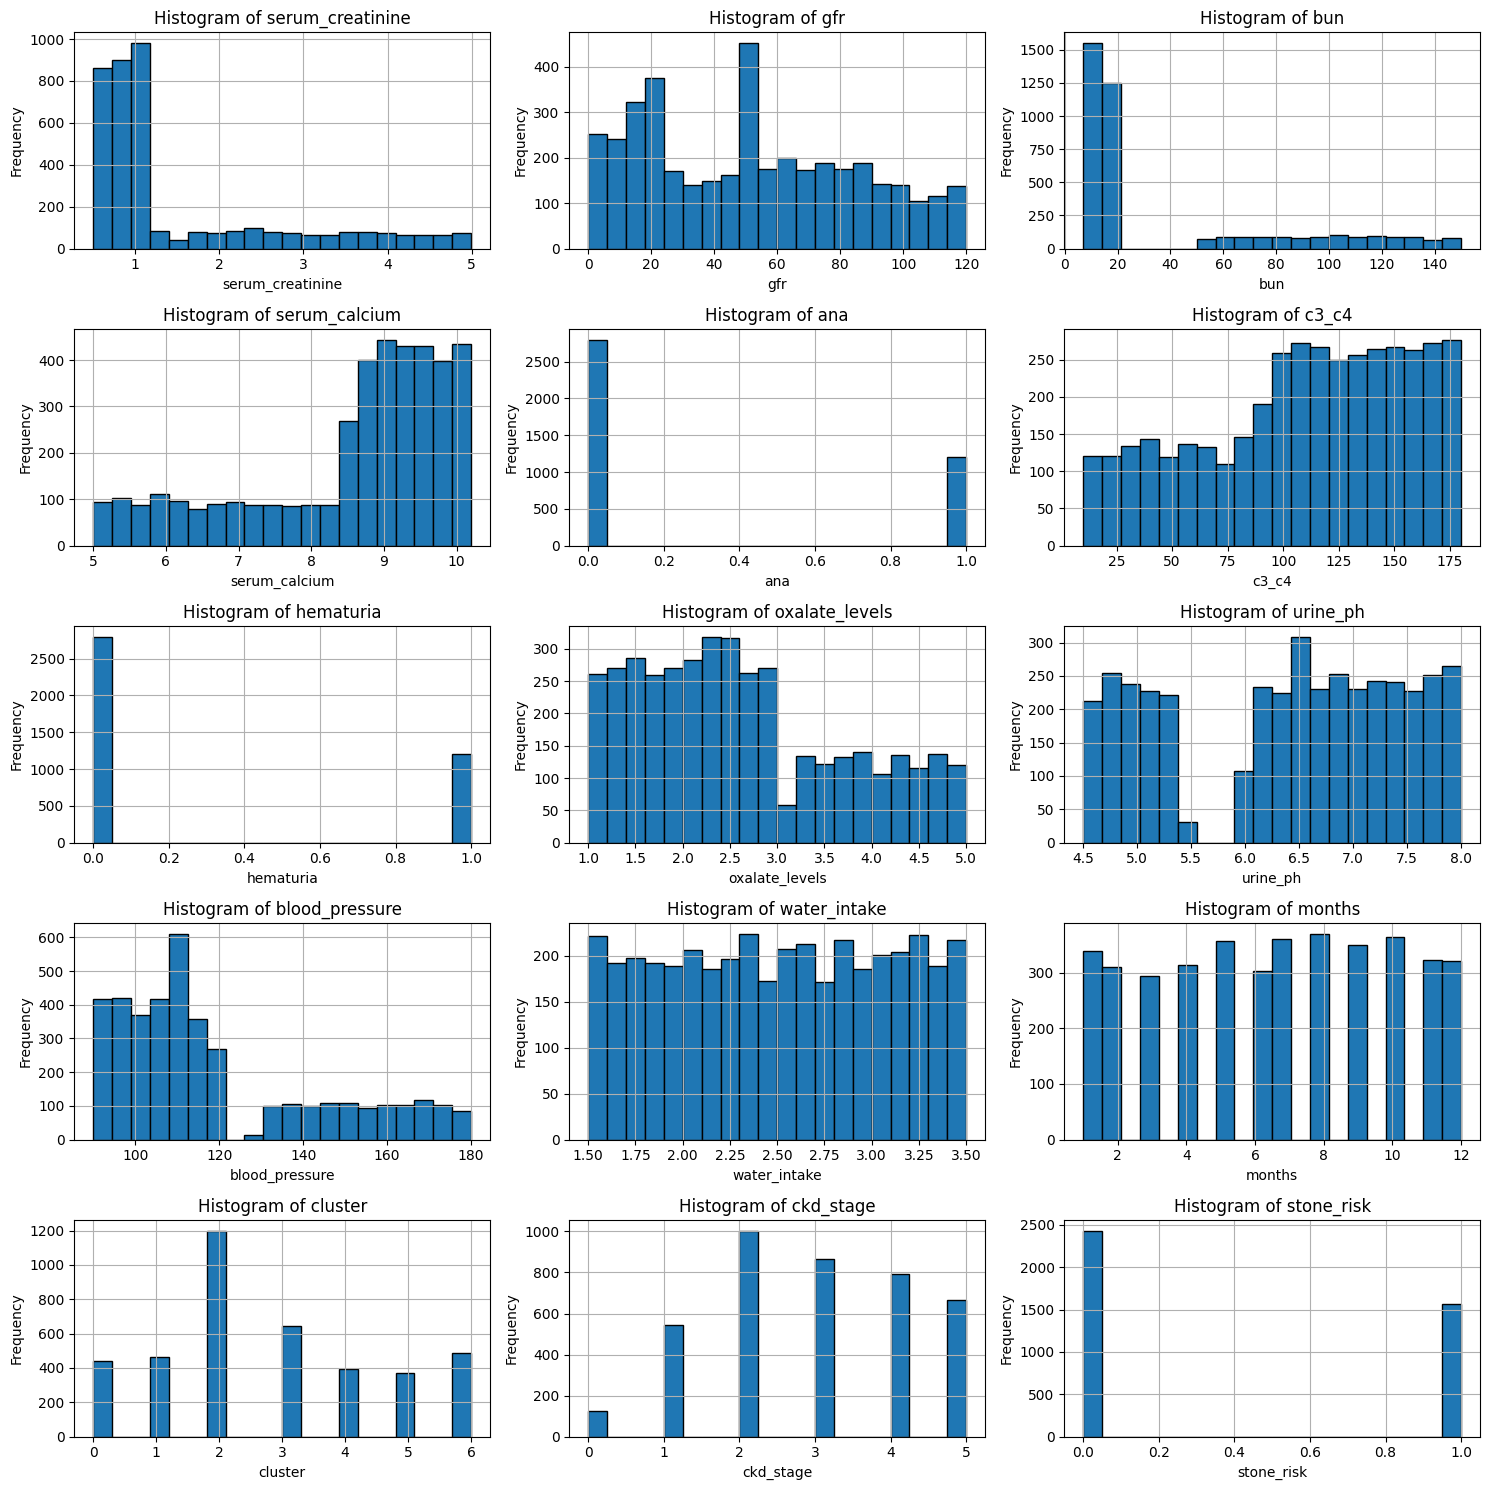

In [14]:
import matplotlib.pyplot as plt
import math

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate optimal grid size
num_plots = len(numeric_columns)
n_cols = 3  # You can adjust the number of columns
n_rows = math.ceil(num_plots / n_cols)

plt.figure(figsize=(15, n_rows * 3)) # Adjust figsize based on number of rows

# Her bir sütun için histogramları çizme
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    df[col].hist(bins=20, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

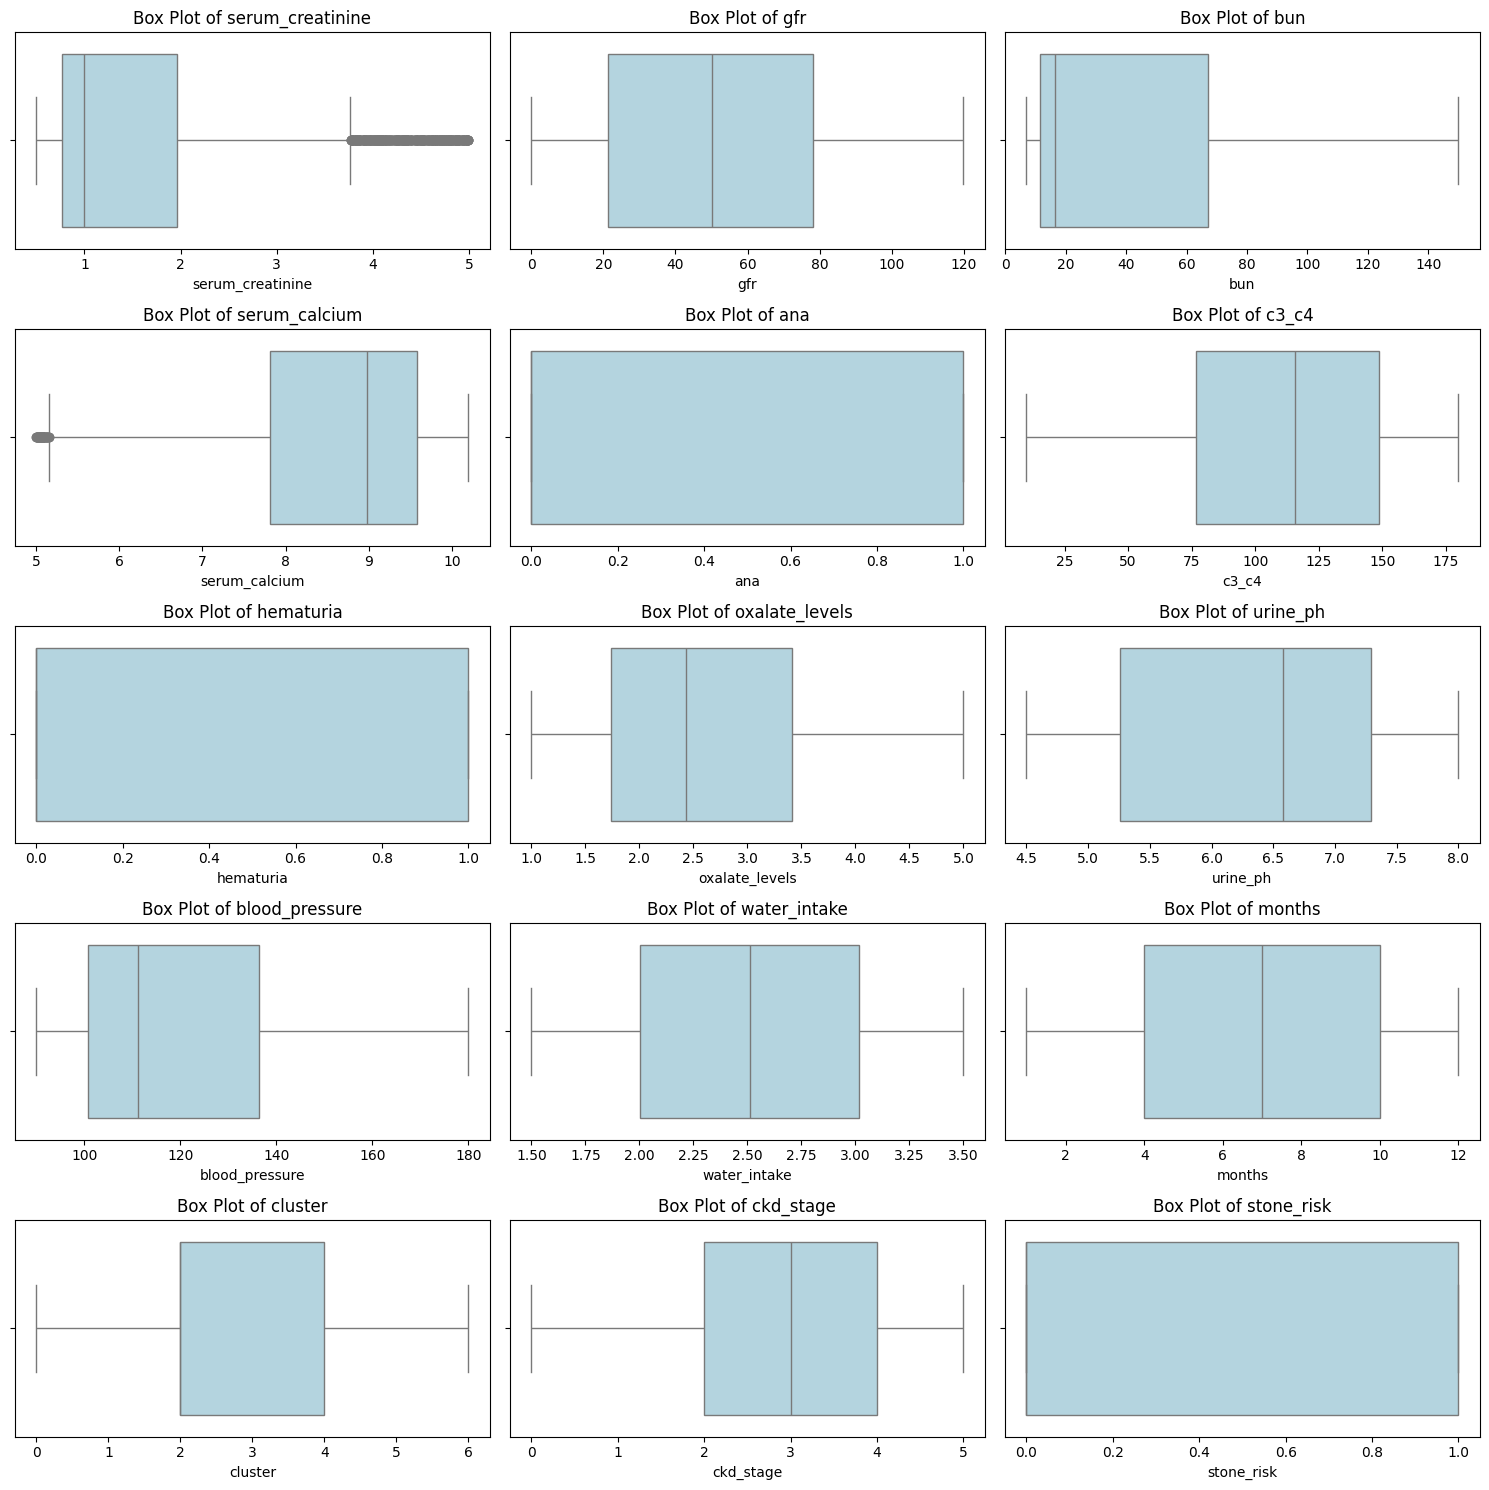

In [15]:
import seaborn as sns
import math
import matplotlib.pyplot as plt

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate optimal grid size for box plots
num_plots = len(numeric_columns)
n_cols = 3  # You can adjust the number of columns
n_rows = math.ceil(num_plots / n_cols)

plt.figure(figsize=(15, n_rows * 3)) # Adjust figsize based on number of rows

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(data=df, x=col, color='lightblue')
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

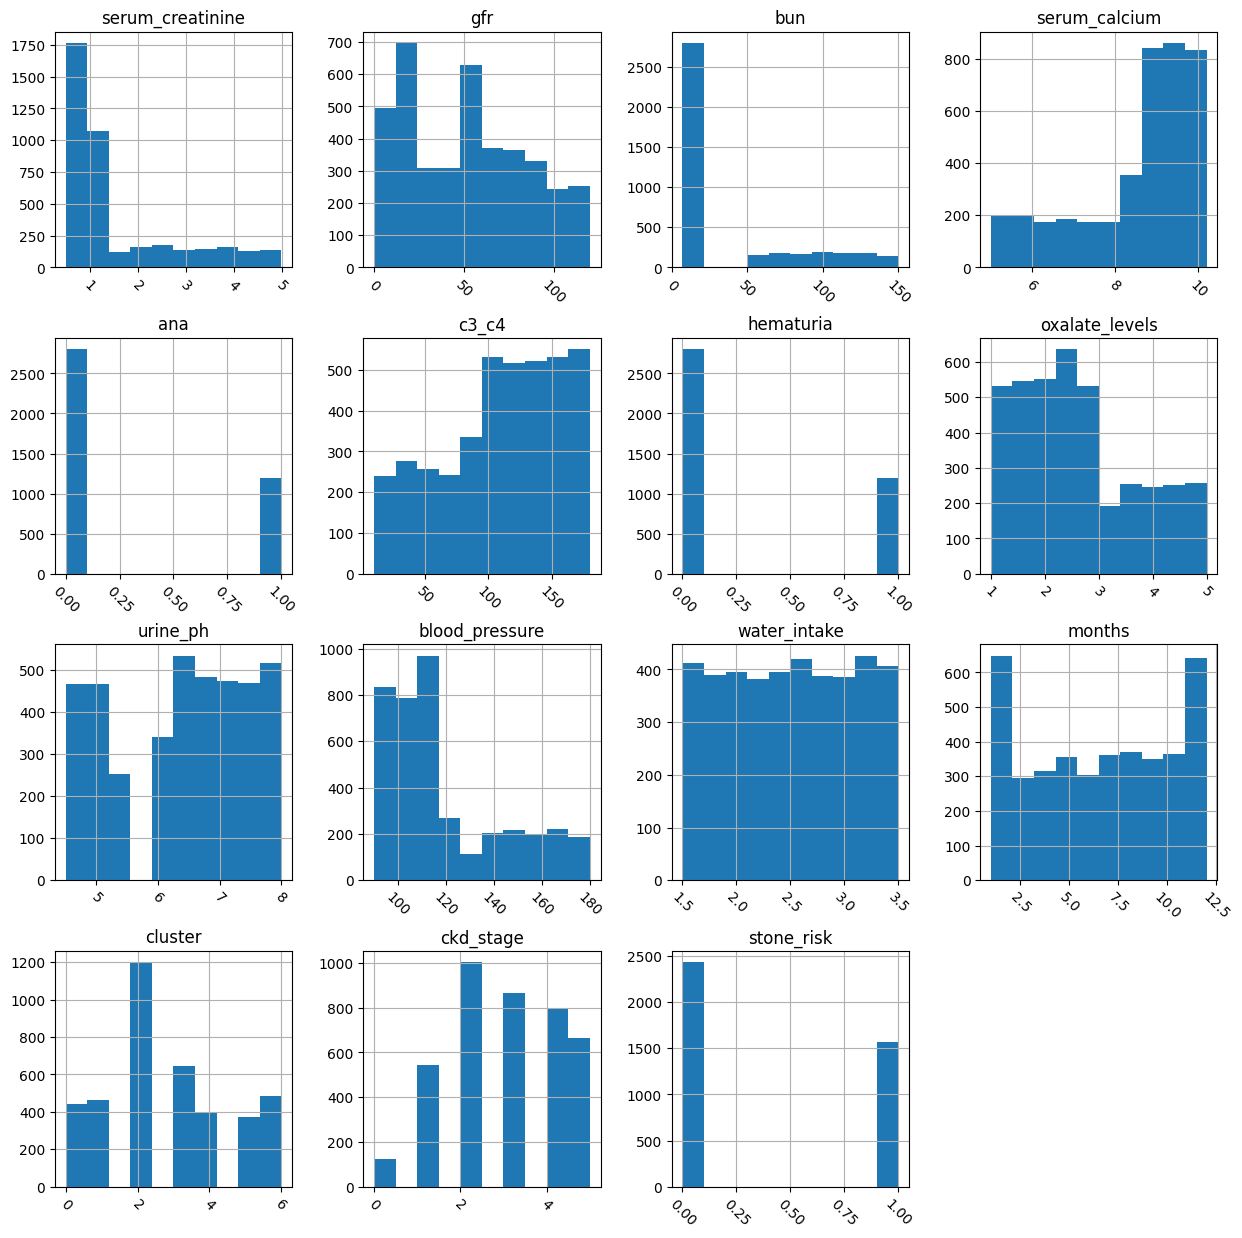

In [16]:
df.hist(figsize=(15,15), xrot=-45,bins=10)
plt.show()

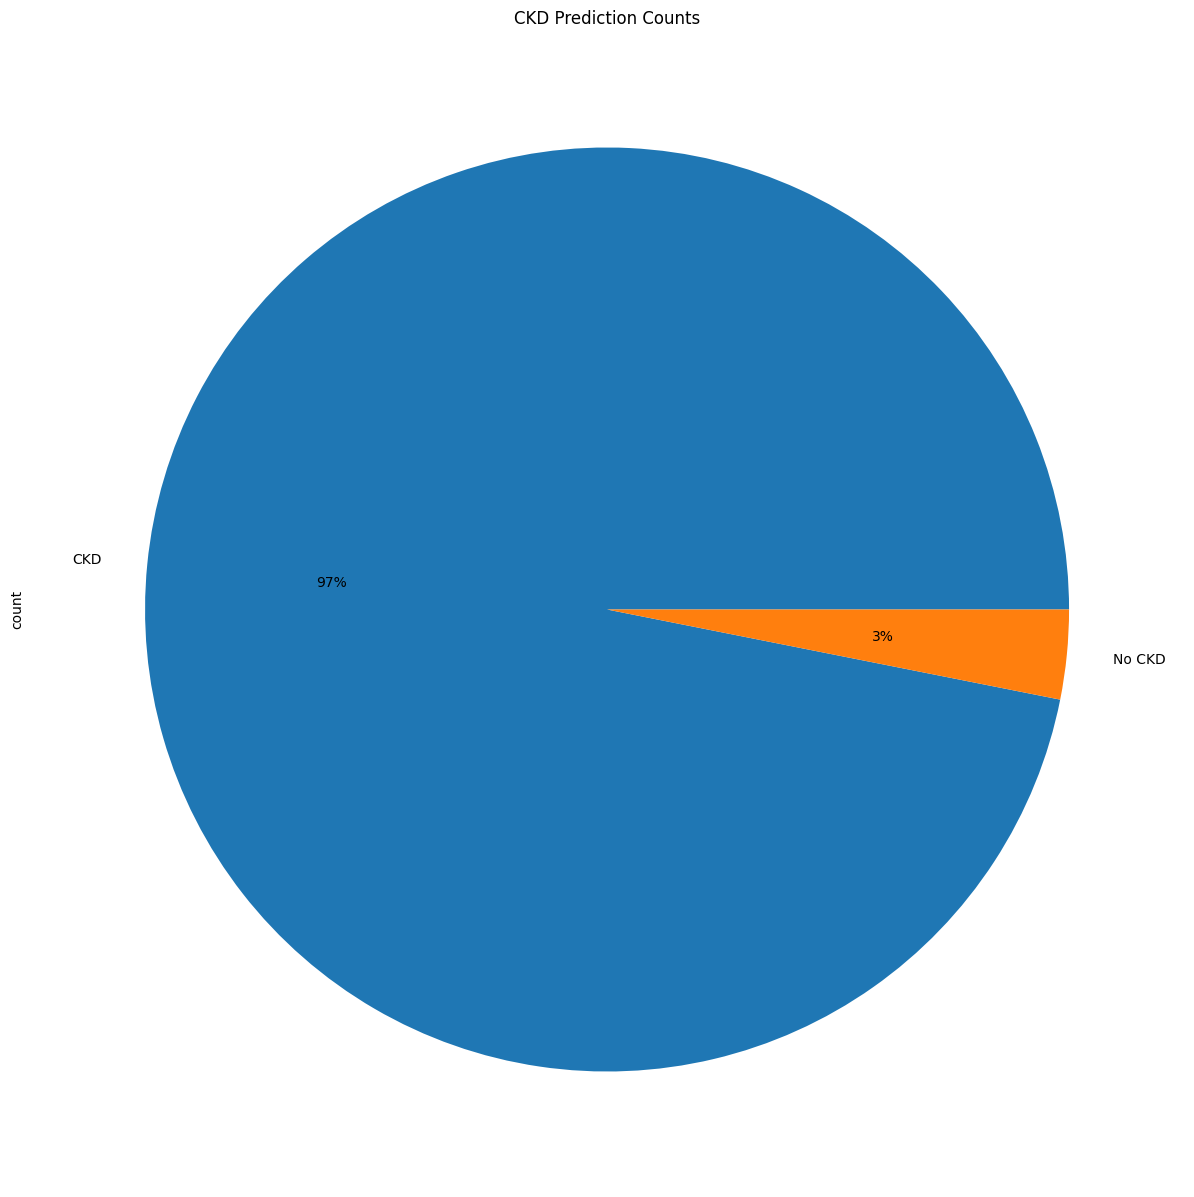

In [17]:
plt.figure(figsize=(15,15))
df["ckd_pred"].value_counts().plot(kind = "pie",autopct='%.0f%%')
plt.title("CKD Prediction Counts")
plt.show()

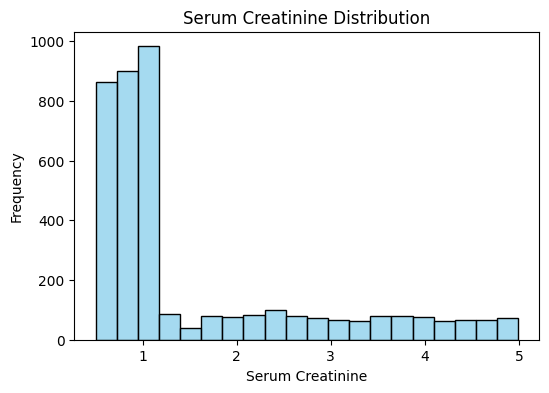

In [18]:
# Serum Creatinine Distribution
# We can use histogram or kdeplot (kernel density estimation) to see the serum_creatinine distribution.

plt.figure(figsize=(6, 4))
sns.histplot(df['serum_creatinine'], bins=20, kde=False, color='skyblue', edgecolor='black')
plt.title('Serum Creatinine Distribution')
plt.xlabel('Serum Creatinine')
plt.ylabel('Frequency')
plt.show()

In [19]:
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
correlation_matrix

,serum_creatinine,gfr,bun,serum_calcium,ana,c3_c4,hematuria,oxalate_levels,urine_ph,blood_pressure,water_intake,months,cluster,ckd_stage,stone_risk
serum_creatinine,1.000000,-0.015979,0.802621,-0.755929,0.865489,-0.727328,0.865489,0.737322,-0.757119,0.762850,-0.002716,0.003886,-0.240639,0.023376,0.686124
gfr,-0.015979,1.000000,0.000397,0.012300,-0.002828,0.016785,-0.002828,-0.010015,-0.015005,0.000680,-0.016428,0.018008,-0.335126,-0.937177,-0.003766
bun,0.802621,0.000397,1.000000,-0.815356,0.929817,-0.783148,0.929817,0.795518,-0.816644,0.820437,0.004775,-0.008916,-0.267475,0.008902,0.737324
serum_calcium,-0.755929,0.012300,-0.815356,1.000000,-0.875599,0.735949,-0.875599,-0.741022,0.769402,-0.775964,0.009775,-0.003584,0.264808,-0.021903,-0.703582
ana,0.865489,-0.002828,0.929817,-0.875599,1.000000,-0.841529,1.000000,0.855105,-0.876565,0.880346,0.001090,-0.004647,-0.284153,0.015651,0.792264
c3_c4,-0.727328,0.016785,-0.783148,0.735949,-0.841529,1.000000,-0.841529,-0.723397,0.739281,-0.739915,-0.009976,0.019436,0.243731,-0.018366,-0.670687
hematuria,0.865489,-0.002828,0.929817,-0.875599,1.000000,-0.841529,1.000000,0.855105,-0.876565,0.880346,0.001090,-0.004647,-0.284153,0.015651,0.792264
oxalate_levels,0.737322,-0.010015,0.795518,-0.741022,0.855105,-0.723397,0.855105,1.000000,-0.743307,0.748900,0.012475,-0.000205,-0.295251,0.020159,0.802241
urine_ph,-0.757119,-0.015005,-0.816644,0.769402,-0.876565,0.739281,-0.876565,-0.743307,1.000000,-0.771987,0.008955,0.013746,0.407118,0.001241,-0.700843
blood_pressure,0.762850,0.000680,0.820437,-0.775964,0.880346,-0.739915,0.880346,0.748900,-0.771987,1.000000,0.002689,-0.006182,-0.273599,0.013600,0.694616


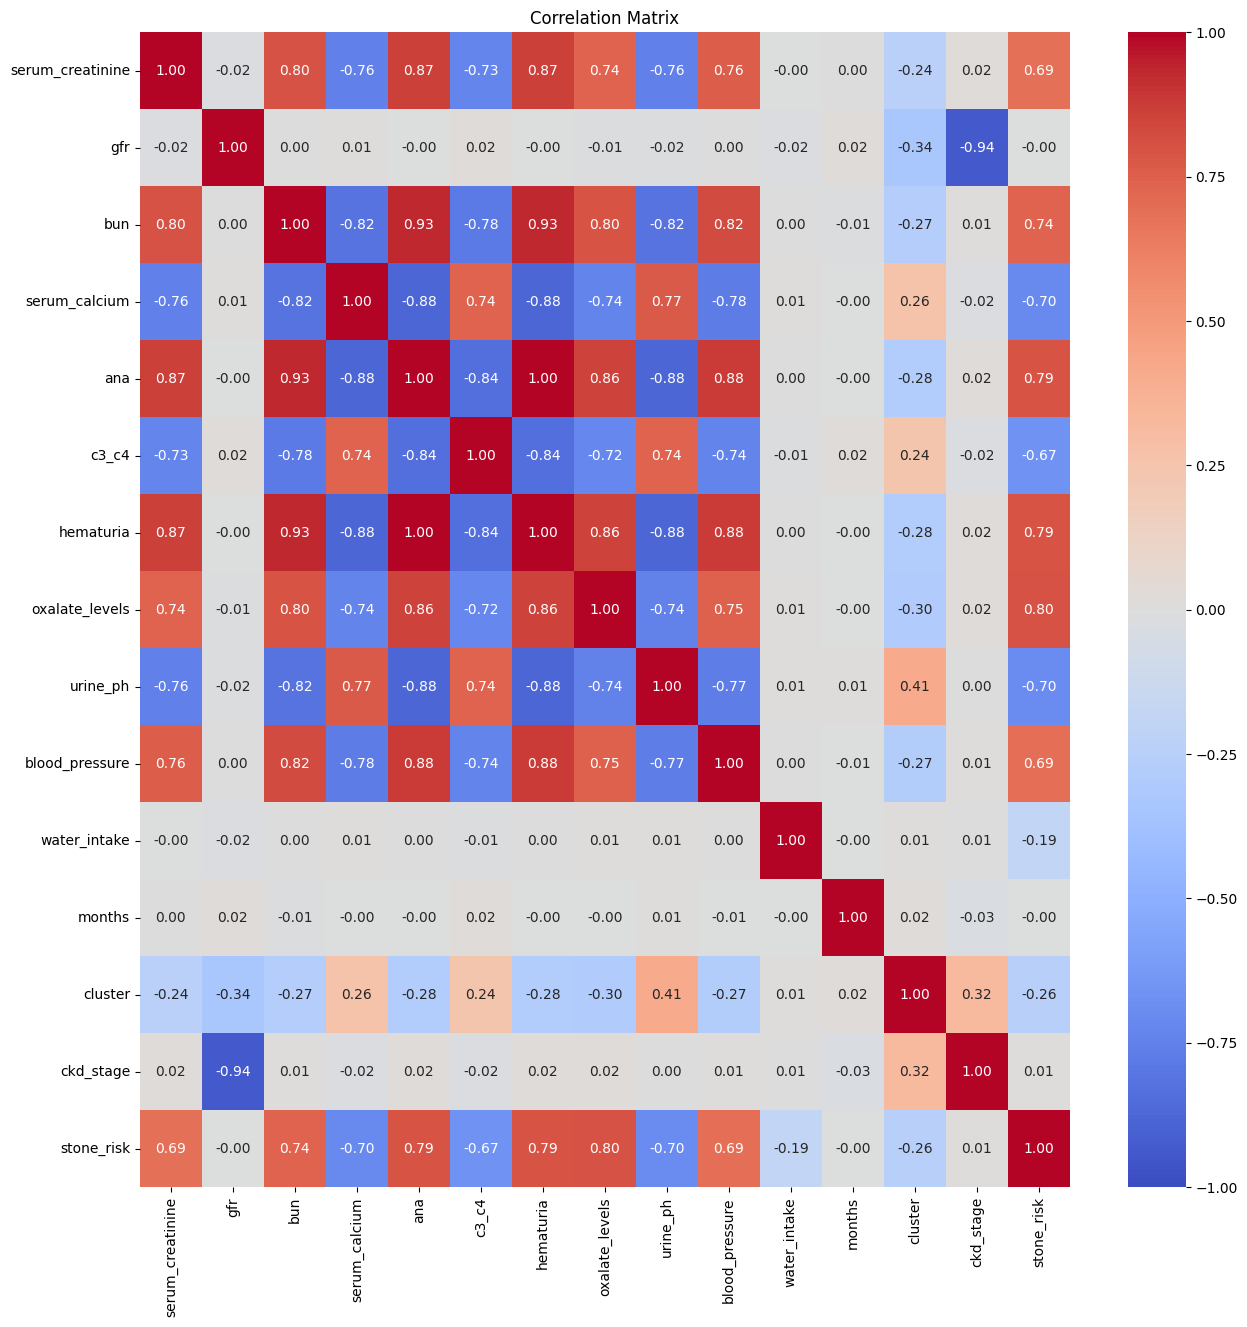

In [20]:
plt.figure(figsize=(15,15 ))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

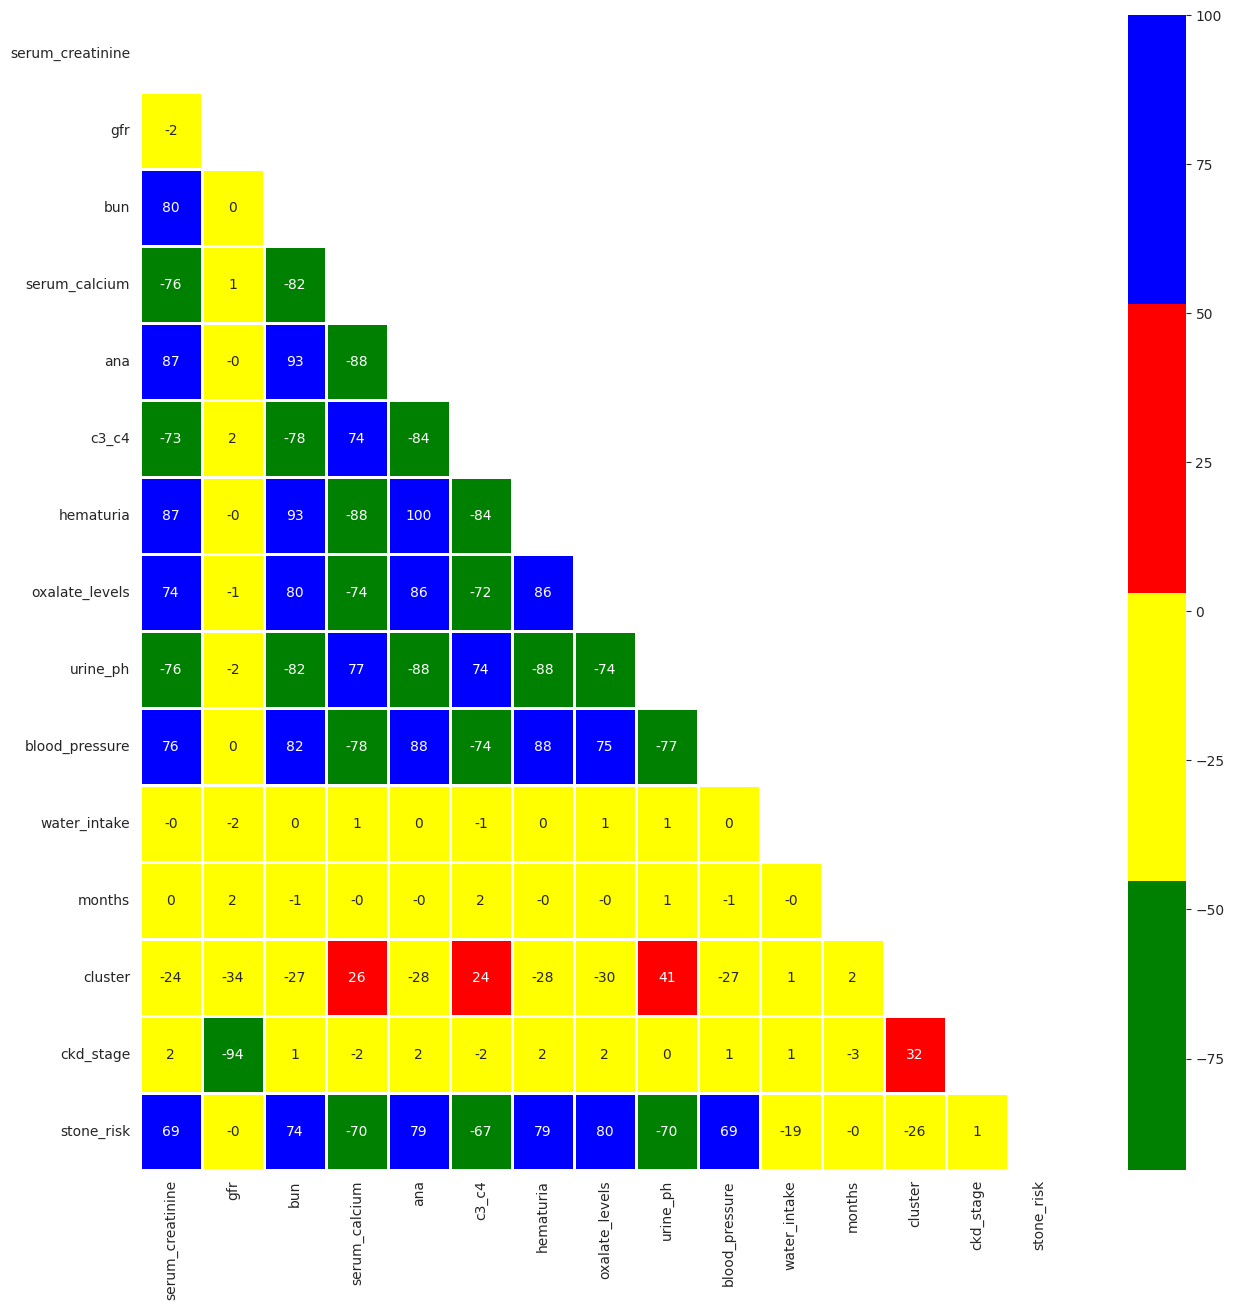

In [21]:
from matplotlib.colors import ListedColormap

mask = np.zeros_like(numeric_df.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(15,15))
with sns.axes_style("white"):
    ax = sns.heatmap(numeric_df.corr()*100, mask=mask, fmt = ".0f", annot=True, lw=1, cmap=ListedColormap(['green','yellow','red','blue']))

In [22]:
x = df.drop(columns=['stone_risk'])

y = df['stone_risk']

In [23]:
print(x)

      serum_creatinine         gfr         bun  serum_calcium  ana  \
0             0.683683   32.946784    7.553739      10.039896    0   
1             3.809044   32.685035  141.347494       8.330543    1   
2             1.143827    2.079805   15.979104       9.419229    0   
3             4.804657  109.871407   53.307333       7.556631    1   
4             4.920235   42.214590  134.182157       7.289379    1   
...                ...         ...         ...            ...  ...   
3995          0.746929   55.157951   18.729510       8.660809    0   
3996          1.033439   87.580624    8.620124       8.895918    0   
3997          0.816066   76.076867   18.792486       9.858060    0   
3998          1.990560  101.914530  101.429299       8.096577    1   
3999          3.781494  115.228982   93.999278       5.289043    1   

           c3_c4  hematuria  oxalate_levels  urine_ph  blood_pressure  ...  \
0     138.204989          0        2.878164  7.864308      115.224217  ...   
1  

In [24]:
print(y)

0       1
1       1
2       0
3       1
4       1
       ..
3995    0
3996    1
3997    0
3998    1
3999    1
Name: stone_risk, Length: 4000, dtype: int64


In [25]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=2)

In [28]:
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Ensure df is available from previous cells

# Prepare x and y (from original df before preprocessing)
x = df.drop(columns=['stone_risk'])
y = df['stone_risk']

# --- Robust Preprocessing for x (incorporated from cell b1dcb591) ---
# Identify all columns that are currently 'object' (string) type
initial_object_cols = x.select_dtypes(include=['object']).columns.tolist()

# Create a copy to perform preprocessing
x_preprocessed = x.copy()

# Iterate through all columns in the preprocessed DataFrame
for col in x_preprocessed.columns:
    # If the column is NOT one of the initial object columns, try to convert it to numeric.
    if col not in initial_object_cols:
        x_preprocessed[col] = pd.to_numeric(x_preprocessed[col], errors='coerce')

        # If NaNs were introduced during coercion, fill them (e.g., with the median)
        if x_preprocessed[col].isnull().any():
            # print(f"Warning: Non-numeric values found and converted to NaN in '{col}'. Filling NaNs with median.")
            x_preprocessed[col].fillna(x_preprocessed[col].median(), inplace=True)

# Now, with potentially 'dirty' numeric columns cleaned, we define the categorical features
categorical_features_for_encoding = initial_object_cols

# Create a ColumnTransformer to apply OneHotEncoder to the identified categorical features
# and pass through all other (now numerical and clean) columns.
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_for_encoding)
    ],
    remainder='passthrough'
)

# Apply the transformation to the preprocessed DataFrame 'x_preprocessed'
x_transformed = preprocessor.fit_transform(x_preprocessed)

# Now perform the train-test split on the fully transformed, numerical features and target
xtrain, xtest, ytrain, ytest = train_test_split(x_transformed, y, test_size=0.2, random_state=2)

# Model training
model = SVC(kernel='linear')
model.fit(xtrain, ytrain)


SVC(kernel='linear')

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Prepare x and y as before
x = df.drop(columns=['stone_risk'])
y = df['stone_risk']

# --- Robust Preprocessing for x ---
# Identify all columns that are currently 'object' (string) type
initial_object_cols = x.select_dtypes(include=['object']).columns.tolist()

# Create a copy to perform preprocessing without altering the original 'x' for potential re-use
x_preprocessed = x.copy()

# Iterate through all columns in the preprocessed DataFrame
for col in x_preprocessed.columns:
    # If the column is NOT one of the initial object columns, try to convert it to numeric.
    # This catches cases where a supposedly numeric column might contain string values (e.g., 'weekly').
    if col not in initial_object_cols:
        x_preprocessed[col] = pd.to_numeric(x_preprocessed[col], errors='coerce')

        # If NaNs were introduced during coercion, it means there were non-numeric strings.
        # Fill these NaNs (e.g., with the median) to ensure the column is fully numeric.
        if x_preprocessed[col].isnull().any():
            print(f"Warning: Non-numeric values found and converted to NaN in '{col}'. Filling NaNs with median.")
            x_preprocessed[col].fillna(x_preprocessed[col].median(), inplace=True)

# Now, with potentially 'dirty' numeric columns cleaned, we define the categorical features
# These are the columns that were initially identified as objects (strings), which will be one-hot encoded.
categorical_features_for_encoding = initial_object_cols

# Create a ColumnTransformer to apply OneHotEncoder to the identified categorical features
# and pass through all other (now numerical and clean) columns.
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_for_encoding)
    ],
    remainder='passthrough'
)

# Apply the transformation to the preprocessed DataFrame 'x_preprocessed'
x_transformed = preprocessor.fit_transform(x_preprocessed)

# Now perform the train-test split on the fully transformed, numerical features and target
xtrain, xtest, ytrain, ytest = train_test_split(x_transformed, y, test_size=0.2, random_state=2)

In [30]:
# accuracy on training data
xtrain_prediction = model.predict(xtrain)
training_data_accuracy = accuracy_score(ytrain, xtrain_prediction)

print('Accuracy on training data = ', training_data_accuracy)

Accuracy on training data =  0.961875


In [31]:
# accuracy on test data
xtest_prediction = model.predict(xtest)
test_data_accuracy = accuracy_score( xtest_prediction, ytest)

print('Accuracy on test data = ', test_data_accuracy)

Accuracy on test data =  0.95125


In [32]:
# Assuming 'preprocessor' is already defined and fitted from cell ebf76666
# and 'x' (original features DataFrame) is also available from before the split.

# The input data must contain all 23 features in the same order as the training data 'x'.
# The provided input_data tuple has only 10 values, which is insufficient.
# You need to provide values for all 23 features. Below is an example.

# Example of how to create a single input record with dummy data for all 23 features.
# REPLACE THESE VALUES WITH YOUR ACTUAL INPUT DATA FOR ALL COLUMNS OF 'x'.
# Ensure that categorical values are strings and numerical values are numbers.
sample_input_data = {
    'serum_creatinine': [1.0], 'gfr': [90.0], 'bun': [15.0], 'serum_calcium': [9.5],
    'ana': [0], 'c3_c4': [100.0], 'hematuria': [0], 'oxalate_levels': [3.0],
    'urine_ph': [6.0], 'blood_pressure': [120.0],
    'physical_activity': ['moderate'], 'diet': ['healthy'], 'water_intake': [2.5],
    'smoking': ['no'], 'alcohol': ['never'], 'painkiller_usage': ['no'],
    'family_history': ['no'], 'weight_changes': ['stable'], 'stress_level': ['low'],
    'months': [5], 'cluster': [1], 'ckd_pred': ['not ckd'], 'ckd_stage': [2]
}

# Create a DataFrame from the sample input data, ensuring column order matches original 'x'
input_df = pd.DataFrame(sample_input_data, columns=x.columns)

# Apply the same preprocessing (one-hot encoding) as done for the training data
input_transformed = preprocessor.transform(input_df)

prediction = model.predict(input_transformed)
print(prediction)

if (prediction[0] == 1):
  print('The person has a high stone risk')
else:
  print('The person has a low stone risk')


[1]
The person has a high stone risk


In [33]:
import pickle


filename = 'Liver Disease.sav'
pickle.dump(model, open(filename, 'wb'))


# loading the saved model
loaded_model = pickle.load(open('Liver Disease.sav', 'rb'))

for column in df.columns:
    print(column)

serum_creatinine
gfr
bun
serum_calcium
ana
c3_c4
hematuria
oxalate_levels
urine_ph
blood_pressure
physical_activity
diet
water_intake
smoking
alcohol
painkiller_usage
family_history
weight_changes
stress_level
months
cluster
ckd_pred
ckd_stage
stone_risk


In [34]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(xtrain, ytrain)

RandomForestClassifier()

In [35]:
# accuracy on training data
xtrain_prediction = model.predict(xtrain)
training_data_accuracy = accuracy_score(ytrain, xtrain_prediction)

print('Accuracy on training data = ', training_data_accuracy)

Accuracy on training data =  1.0


In [36]:
# accuracy on test data
xtest_prediction = model.predict(xtest)
test_data_accuracy = accuracy_score( xtest_prediction, ytest)

print('Accuracy on test data = ', test_data_accuracy)

Accuracy on test data =  0.9875


In [37]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(xtrain,ytrain)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
# accuracy on test data
xtest_prediction = model.predict(xtest)
test_data_accuracy = accuracy_score( xtest_prediction, ytest)

print('Accuracy on test data = ', test_data_accuracy)

Accuracy on test data =  0.95625


In [39]:
# Classification Report
print("\LogisticRegression Classification Report:\n", classification_report(ytest,xtest_prediction ))

\LogisticRegression Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       485
           1       0.94      0.95      0.94       315

    accuracy                           0.96       800
   macro avg       0.95      0.96      0.95       800
weighted avg       0.96      0.96      0.96       800



<>:2: SyntaxWarning: invalid escape sequence '\L'
<>:2: SyntaxWarning: invalid escape sequence '\L'
/tmp/ipython-input-124163155.py:2: SyntaxWarning: invalid escape sequence '\L'
  print("\LogisticRegression Classification Report:\n", classification_report(ytest,xtest_prediction ))


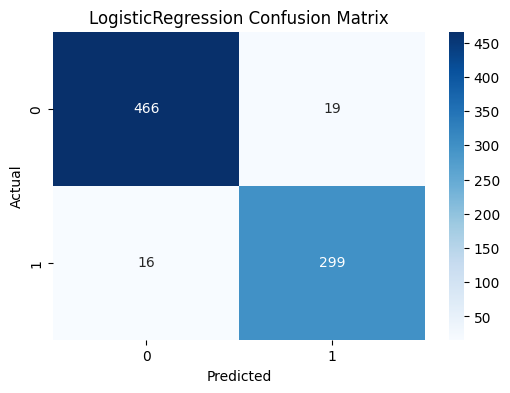

In [40]:
# Generate Confusion Matrix
cm = confusion_matrix(ytest, xtest_prediction)

# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(ytest), yticklabels=np.unique(ytest))
plt.title("LogisticRegression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [41]:
# Import ML Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [42]:
### 1. K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain, ytrain)
knn_pred = knn.predict(xtest)
print("KNN Accuracy:", accuracy_score(ytest, knn_pred))

KNN Accuracy: 0.90125


In [43]:
### 2. Decision Tree
dt = DecisionTreeClassifier()
dt.fit(xtrain, ytrain)
dt_pred = dt.predict(xtest)
print("Decision Tree Accuracy:", accuracy_score(dt_pred,ytest ))

Decision Tree Accuracy: 0.99375


In [44]:
from sklearn import svm
# Train the model
model = svm.SVC(kernel='linear')
model.fit(xtrain, ytrain)
y_pre = model.predict(xtest)
accuracy = accuracy_score(ytest,y_pre)
accuracy

0.95125

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(random_state=42)
model.fit(xtrain, ytrain)
xtest_prediction = model.predict(xtest)
test_data_accuracy = accuracy_score( xtest_prediction, ytest)

print('Accuracy on test data = ', test_data_accuracy)

Accuracy on test data =  0.99375


In [46]:
### 5. Artificial Neural Network (ANN)
model = Sequential([
    Dense(16, activation='relu', input_shape=(xtrain.shape[1],)),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes in Iris dataset
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(xtrain, ytrain, epochs=50, batch_size=5, verbose=0)

# Evaluate ANN
ann_pred = np.argmax(model.predict(xtest), axis=1)
print("ANN Accuracy:", accuracy_score(ytest, ann_pred))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
ANN Accuracy: 0.9475


In [47]:
from sklearn.naive_bayes import GaussianNB #Naive bayes

model = GaussianNB()
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)
test_data_accuracy = accuracy_score( y_pred, ytest)
print('Accuracy on test data = ', test_data_accuracy)

Accuracy on test data =  0.90375


In [48]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(xtrain, ytrain)
random=model.predict(xtest)
print("Random Forest Accuracy:", accuracy_score(random,ytest ))

Random Forest Accuracy: 0.98875


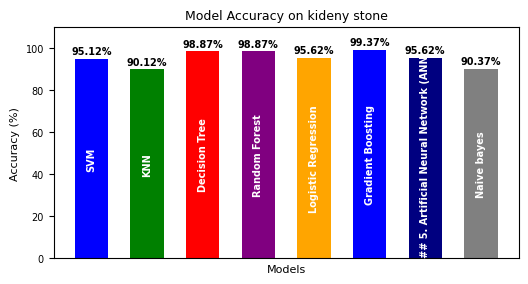

In [49]:
import matplotlib.pyplot as plt

# Data
models = ["SVM", "KNN", "Decision Tree", "Random Forest", "Logistic Regression", "Gradient Boosting","### 5. Artificial Neural Network (ANN)","Naive bayes"]
accuracy = [95.12, 90.12, 98.87, 98.87, 95.62, 99.37, 95.62, 90.37] # Added ANN accuracy (95.62) and corrected Logistic Regression

# Plot
plt.figure(figsize=(6, 3))  # Small figure size
bars = plt.bar(models, accuracy, color=['blue', 'green', 'red', 'purple', 'orange', 'blue', 'navy', 'gray'], width=0.6)

# Add model names inside the bars (centered)
for bar, model in zip(bars, models):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()/2, model, ha='center', va='center',
             fontsize=7, fontweight='bold', color='white', rotation=90)  # Rotated for better fit

# Add accuracy values above the bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, f"{bar.get_height():.2f}%",
             ha='center', fontsize=7, fontweight='bold', color='black')

# Labels and title
plt.xlabel("Models", fontsize=8)
plt.ylabel("Accuracy (%)", fontsize=8)
plt.title("Model Accuracy on kideny stone", fontsize=9)
plt.xticks([])  # Remove x-axis labels since names are inside bars
plt.yticks(fontsize=7)
plt.ylim(0, 110)  # Set y-axis limit above 100

# Show plot
plt.show()